In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import export_text

In [2]:
# Load the iris dataset for building DT
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
x = iris.data[:,:2]
y = iris.target

In [4]:
pd.DataFrame(y).value_counts()

0    50
1    50
2    50
Name: count, dtype: int64

In [5]:
pd.DataFrame(x).describe()

,0,1
count,150.000000,150.000000
mean,5.843333,3.057333
std,0.828066,0.435866
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


In [6]:
# split the data into training and test for builiding DT model and for prediction
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [8]:
# predict
y_pred_train = dt_clf.predict(x_train)
y_pred_test = dt_clf.predict(x_test)

In [9]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [10]:
confusion_matrix(y_test, y_pred_test)

array([[14,  1,  0],
       [ 0,  5,  6],
       [ 0,  6,  6]], dtype=int64)

In [11]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.42      0.45      0.43        11
           2       0.50      0.50      0.50        12

    accuracy                           0.66        38
   macro avg       0.64      0.63      0.63        38
weighted avg       0.67      0.66      0.66        38



In [12]:
print(accuracy_score(y_train, y_pred_train))
print()
print(accuracy_score(y_test, y_pred_test))

0.9553571428571429

0.6578947368421053


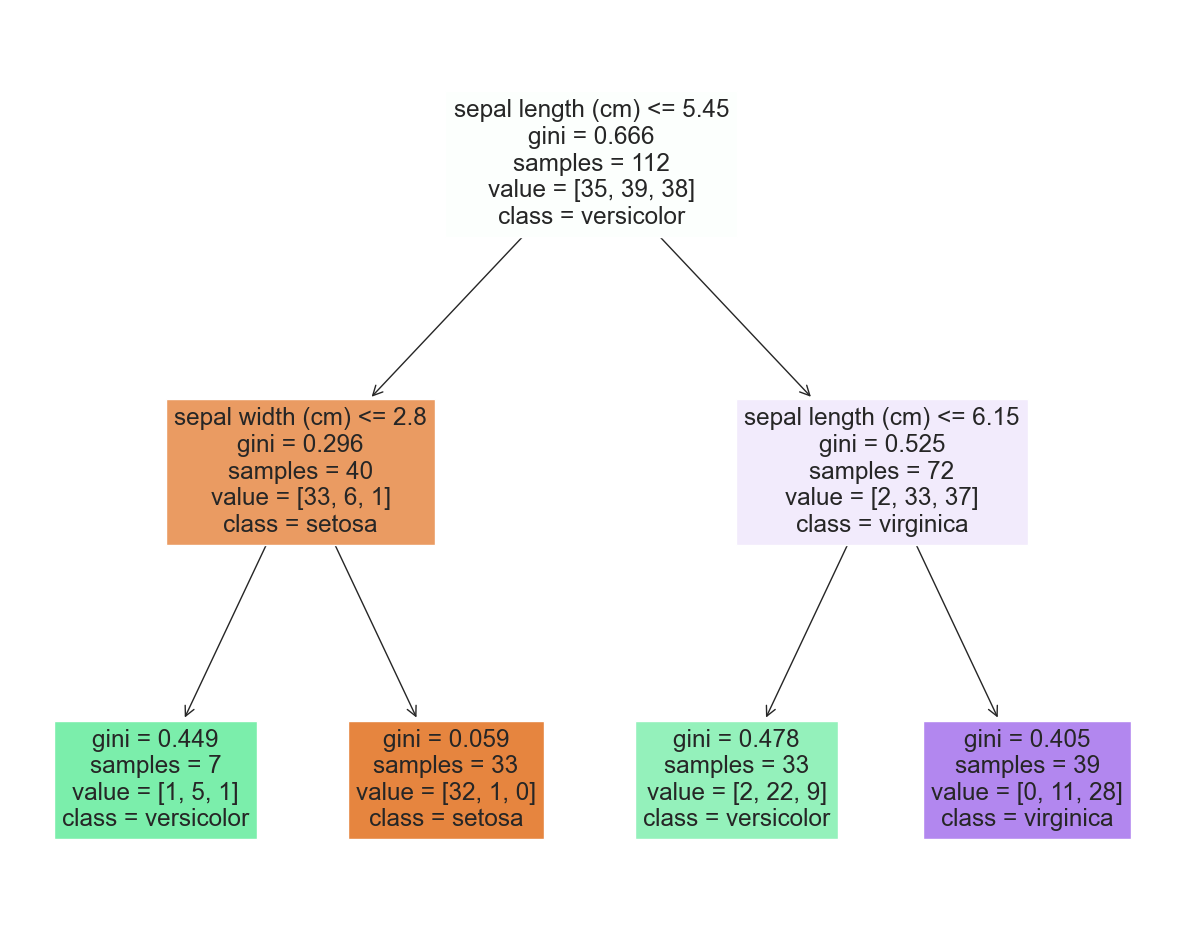

In [13]:
# plot the decisionTree Classifier
dt_clf = DecisionTreeClassifier(max_depth=2)
dt_clf.fit(x_train, y_train)

y_pred_train = dt_clf.predict(x_train)
y_pred_test = dt_clf.predict(x_test)


from sklearn.tree import plot_tree
from sklearn.tree import export_text
plt.figure(figsize=(15,12))
plot_tree(dt_clf, filled=True, feature_names=iris.feature_names[:2], 
          class_names=iris.target_names)
plt.show()



In [14]:
print(accuracy_score(y_train, y_pred_train))
print()
print(accuracy_score(y_test, y_pred_test))

0.7767857142857143

0.7631578947368421


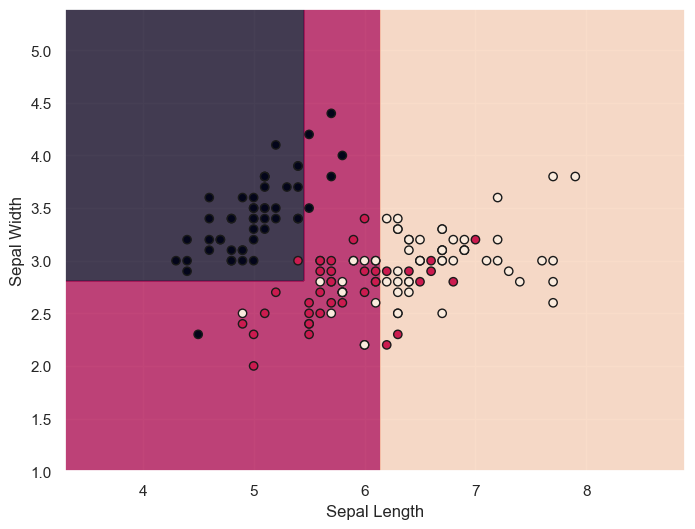

In [15]:
# Plot the decision boundary
plt.figure(figsize=(8,6))
x_min, x_max = x[:,0].min() - 1, x[:,0].max()+1
y_min, y_max = x[:,1].min() - 1, x[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), 
                     np.arange(y_min, y_max, 0.01))
z = dt_clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, alpha=0.8)
plt.scatter(x[:,0], x[:,1], c=y, edgecolor='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [16]:
explain = export_text(dt_clf, feature_names=['sepal_length', 'sepal_width'])
print(explain)

|--- sepal_length <= 5.45
|   |--- sepal_width <= 2.80
|   |   |--- class: 1
|   |--- sepal_width >  2.80
|   |   |--- class: 0
|--- sepal_length >  5.45
|   |--- sepal_length <= 6.15
|   |   |--- class: 1
|   |--- sepal_length >  6.15
|   |   |--- class: 2



# DecisionTree Project : 

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import export_text

In [18]:
df = pd.read_csv('MulticlassClassificationDataset.csv')
df.head()

,studyName,Sample Number,Species,Island,Individual ID,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Torgersen,N1A1,11/11/2007,39.1,18.7,181,.,MALE,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Torgersen,N1A2,11/11/2007,39.5,17.4,186,3800,FEMALE,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Torgersen,N2A1,11/16/2007,40.3,18.0,.,3250,FEMALE,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Torgersen,N2A2,11/16/2007,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Torgersen,N3A1,11/16/2007,36.7,19.3,193,3450,FEMALE,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Island               344 non-null    object 
 4   Individual ID        344 non-null    object 
 5   Date Egg             344 non-null    object 
 6   Culmen Length (mm)   342 non-null    float64
 7   Culmen Depth (mm)    342 non-null    float64
 8   Flipper Length (mm)  342 non-null    object 
 9   Body Mass (g)        342 non-null    object 
 10  Sex                  334 non-null    object 
 11  Comments             26 non-null     object 
dtypes: float64(2), int64(1), object(9)
memory usage: 32.4+ KB


In [20]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Island', 'Individual ID',
       'Date Egg', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Comments'],
      dtype='object')

In [21]:
# dropping non-significant vvariable - Pre-prunning approach
df.drop(['studyName','Sample Number','Individual ID', 'Date Egg','Comments'], axis=1, inplace=True)

In [22]:
df.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1,18.7,181,.,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,.,3250,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193,3450,FEMALE


In [23]:
df.isnull().sum()/len(df)*100

Species                0.000000
Island                 0.000000
Culmen Length (mm)     0.581395
Culmen Depth (mm)      0.581395
Flipper Length (mm)    0.581395
Body Mass (g)          0.581395
Sex                    2.906977
dtype: float64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  342 non-null    object 
 5   Body Mass (g)        342 non-null    object 
 6   Sex                  334 non-null    object 
dtypes: float64(2), object(5)
memory usage: 18.9+ KB


In [25]:
for i in df.columns:
    print("**********************************", i ,
         "*******************************************")
    print()
    print(set(df[i].tolist()))
    print()

********************************** Species *******************************************

{'Chinstrap penguin (Pygoscelis antarctica)', 'Gentoo penguin (Pygoscelis papua)', 'Adelie Penguin (Pygoscelis adeliae)'}

********************************** Island *******************************************

{'Torgersen', 'Biscoe', 'Dream'}

********************************** Culmen Length (mm) *******************************************

{49.4, 49.9, 37.3, 45.7, 50.4, 32.1, 33.1, 33.5, 35.6, 36.2, 35.7, 38.1, 35.2, 40.2, 41.5, 34.1, 34.6, 36.7, 37.8, 38.9, 39.5, 40.3, 42.0, 41.1, 42.5, 46.0, 44.1, 45.8, 46.5, 50.0, 51.3, 52.7, 51.7, 52.0, 58.0, 54.2, 55.8, 59.6, 47.7, 47.2, 48.2, 45.0, 50.2, 43.8, nan, 34.4, 34.5, 34.0, 35.9, 35.3, 35.0, 35.1, 35.5, 36.6, 36.4, 36.5, 36.0, 36.9, 37.7, 37.9, 37.2, 37.6, 37.0, 38.6, 38.7, 38.2, 38.8, 37.5, 39.1, 39.3, 39.2, 39.8, 39.6, 39.0, 39.7, 40.6, 40.5, 40.9, 40.8, 40.1, 41.4, 41.3, 41.6, 41.8, 41.0, 42.2, 42.3, 42.8, 42.1, 42.9, 43.2, 42.7, 43.1, 43.5, 43.3,

In [26]:
df['Flipper Length (mm)'].value_counts()

Flipper Length (mm)
190    22
187    16
195    16
193    15
210    14
191    13
215    12
196    10
197    10
185     9
220     8
198     8
208     8
216     8
212     7
186     7
230     7
192     7
181     7
189     7
184     7
188     6
222     6
201     6
213     6
217     6
199     6
214     6
209     5
219     5
218     5
221     5
203     5
180     5
194     5
178     4
200     4
228     4
225     4
202     4
205     3
224     3
182     3
223     2
183     2
229     2
211     2
207     2
231     1
176     1
174     1
.       1
206     1
172     1
179     1
226     1
Name: count, dtype: int64

In [27]:
df['Flipper Length (mm)'] = np.where(df['Flipper Length (mm)']=='.','190', 
                                     df['Flipper Length (mm)'])

In [28]:
df['Body Mass (g)'].value_counts()

Body Mass (g)
3800    12
3700    11
3900    10
3950    10
3550     9
        ..
4475     1
3975     1
3575     1
3850     1
5750     1
Name: count, Length: 95, dtype: int64

In [29]:
df['Body Mass (g)'] = np.where(df['Body Mass (g)']=='.','3800',df['Body Mass (g)'])

In [30]:
df['Flipper Length (mm)'] = pd.to_numeric(df['Flipper Length (mm)'])

In [31]:
df['Body Mass (g)'] = pd.to_numeric(df['Body Mass (g)'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  342 non-null    float64
 5   Body Mass (g)        342 non-null    float64
 6   Sex                  334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


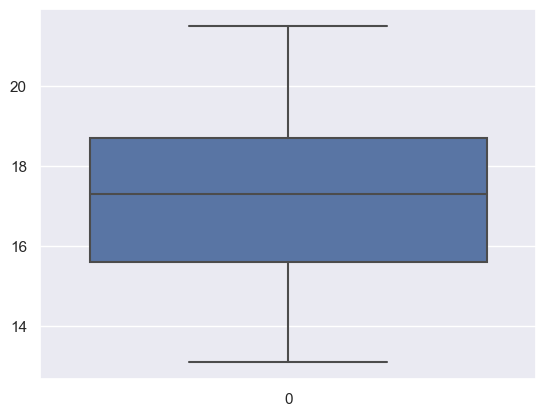

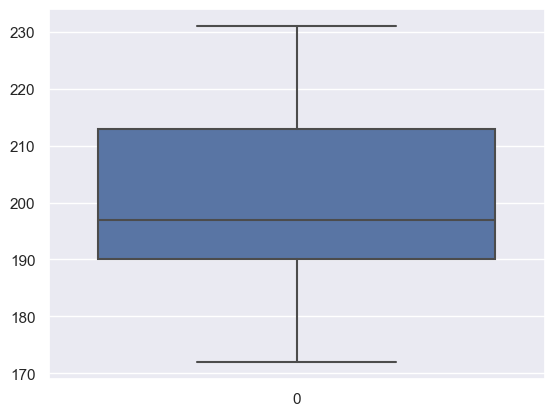

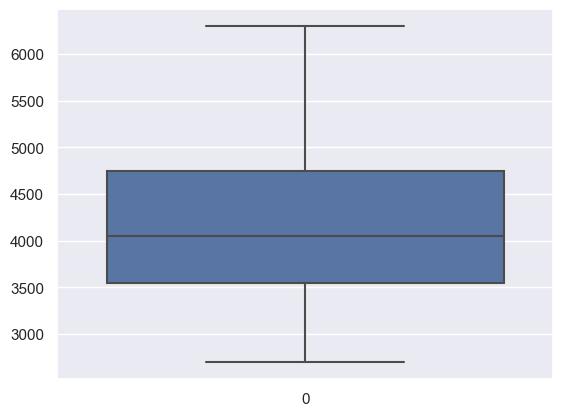

In [33]:
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.select_dtypes(exclude=['object']).columns)[1:]:
    boxplots(i)

In [34]:
# Impute the missing value by using SKLEARN function

"""
from sklearn.impute import SimpleImputer

simple_impute = SimpleImputer(strategy='mean')
x[:,1:-1] = simple_impute.fit_transform(x[:,1:-1])
x
"""

"\nfrom sklearn.impute import SimpleImputer\n\nsimple_impute = SimpleImputer(strategy='mean')\nx[:,1:-1] = simple_impute.fit_transform(x[:,1:-1])\nx\n"

In [35]:
df.isnull().sum()

Species                 0
Island                  0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
dtype: int64

In [36]:
df['Culmen Length (mm)'] = df['Culmen Length (mm)'].fillna(df['Culmen Length (mm)'].mean())
df['Culmen Depth (mm)'] = df['Culmen Depth (mm)'].fillna(df['Culmen Depth (mm)'].mean())
df['Flipper Length (mm)'] = df['Flipper Length (mm)'].fillna(df['Flipper Length (mm)'].mean())
df['Body Mass (g)'] = df['Body Mass (g)'].fillna(df['Body Mass (g)'].mean())

In [37]:
df['Sex'].value_counts()

Sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

In [38]:
df['Sex'] = np.where(df['Sex']=='.','MALE', df['Sex'])

In [39]:
df['Sex'] = df['Sex'].fillna('MALE')

In [40]:
df.isnull().sum()

Species                0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   344 non-null    float64
 3   Culmen Depth (mm)    344 non-null    float64
 4   Flipper Length (mm)  344 non-null    float64
 5   Body Mass (g)        344 non-null    float64
 6   Sex                  344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [42]:
# Dependent variable - only label encoding required - Species
df['Species'] = df['Species'].astype('category')
df['Species'] = df['Species'].cat.codes
df.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,0,Torgersen,39.10000,18.70000,181.000000,3800.000000,MALE
1,0,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,0,Torgersen,40.30000,18.00000,190.000000,3250.000000,FEMALE
3,0,Torgersen,43.92193,17.15117,200.900585,4201.900585,MALE
4,0,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [43]:
df['Species'].value_counts()

Species
0    152
2    124
1     68
Name: count, dtype: int64

In [44]:
df['Island'].value_counts()

Island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [45]:
df = pd.get_dummies(df, columns=['Island', 'Sex'])

In [46]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Biscoe,Island_Dream,Island_Torgersen,Sex_FEMALE,Sex_MALE
0,0,39.10000,18.70000,181.000000,3800.000000,False,False,True,False,True
1,0,39.50000,17.40000,186.000000,3800.000000,False,False,True,True,False
2,0,40.30000,18.00000,190.000000,3250.000000,False,False,True,True,False
3,0,43.92193,17.15117,200.900585,4201.900585,False,False,True,False,True
4,0,36.70000,19.30000,193.000000,3450.000000,False,False,True,True,False


In [47]:
df = df.drop(['Island_Biscoe','Sex_FEMALE'], axis=1)

In [48]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Dream,Island_Torgersen,Sex_MALE
0,0,39.10000,18.70000,181.000000,3800.000000,False,True,True
1,0,39.50000,17.40000,186.000000,3800.000000,False,True,False
2,0,40.30000,18.00000,190.000000,3250.000000,False,True,False
3,0,43.92193,17.15117,200.900585,4201.900585,False,True,True
4,0,36.70000,19.30000,193.000000,3450.000000,False,True,False


In [49]:
df.describe()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
count,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.918605,43.921930,17.151170,200.900585,4201.900585
std,0.893320,5.443643,1.969027,14.029396,799.535241
min,0.000000,32.100000,13.100000,172.000000,2700.000000
25%,0.000000,39.275000,15.600000,190.000000,3550.000000
50%,1.000000,44.250000,17.300000,197.000000,4050.000000
75%,2.000000,48.500000,18.700000,213.000000,4750.000000
max,2.000000,59.600000,21.500000,231.000000,6300.000000


Number of Male : 179
Number of Female : 165


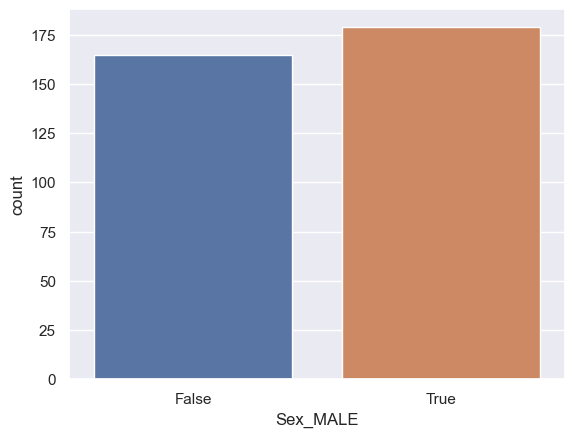

In [50]:
sns.countplot(data=df, x='Sex_MALE')
Male, Female = df['Sex_MALE'].value_counts()
print("Number of Male :", Male)
print("Number of Female :", Female)
plt.show()

Number of A : 152
Number of B : 124
Number of C: 68


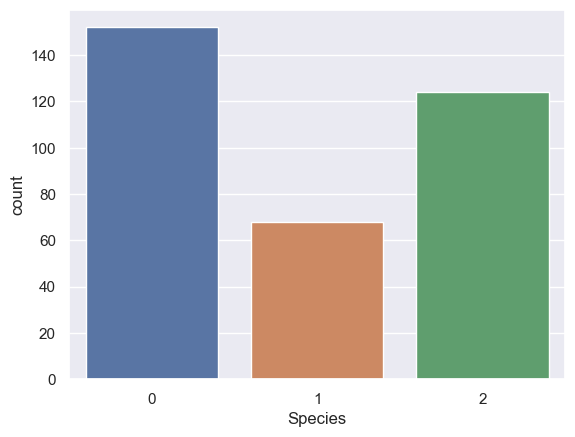

In [51]:
# imbalance check
sns.countplot(data=df, x='Species')
A, B, C = df['Species'].value_counts()
print("Number of A :", A)
print("Number of B :",B)
print("Number of C:", C)
plt.show()

In [52]:
df.columns

Index(['Species', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Island_Dream',
       'Island_Torgersen', 'Sex_MALE'],
      dtype='object')

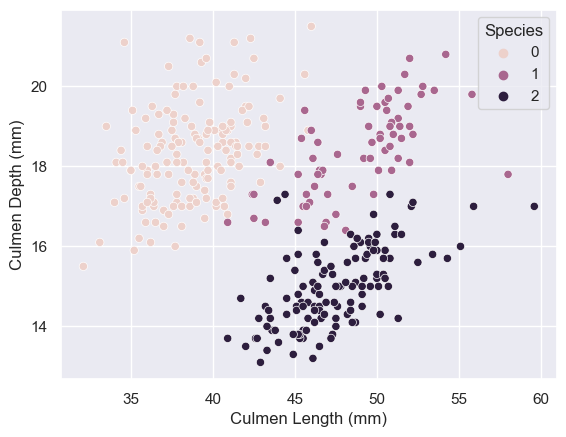

In [53]:
sns.scatterplot(x='Culmen Length (mm)', y ='Culmen Depth (mm)', data=df, hue='Species')
plt.show()

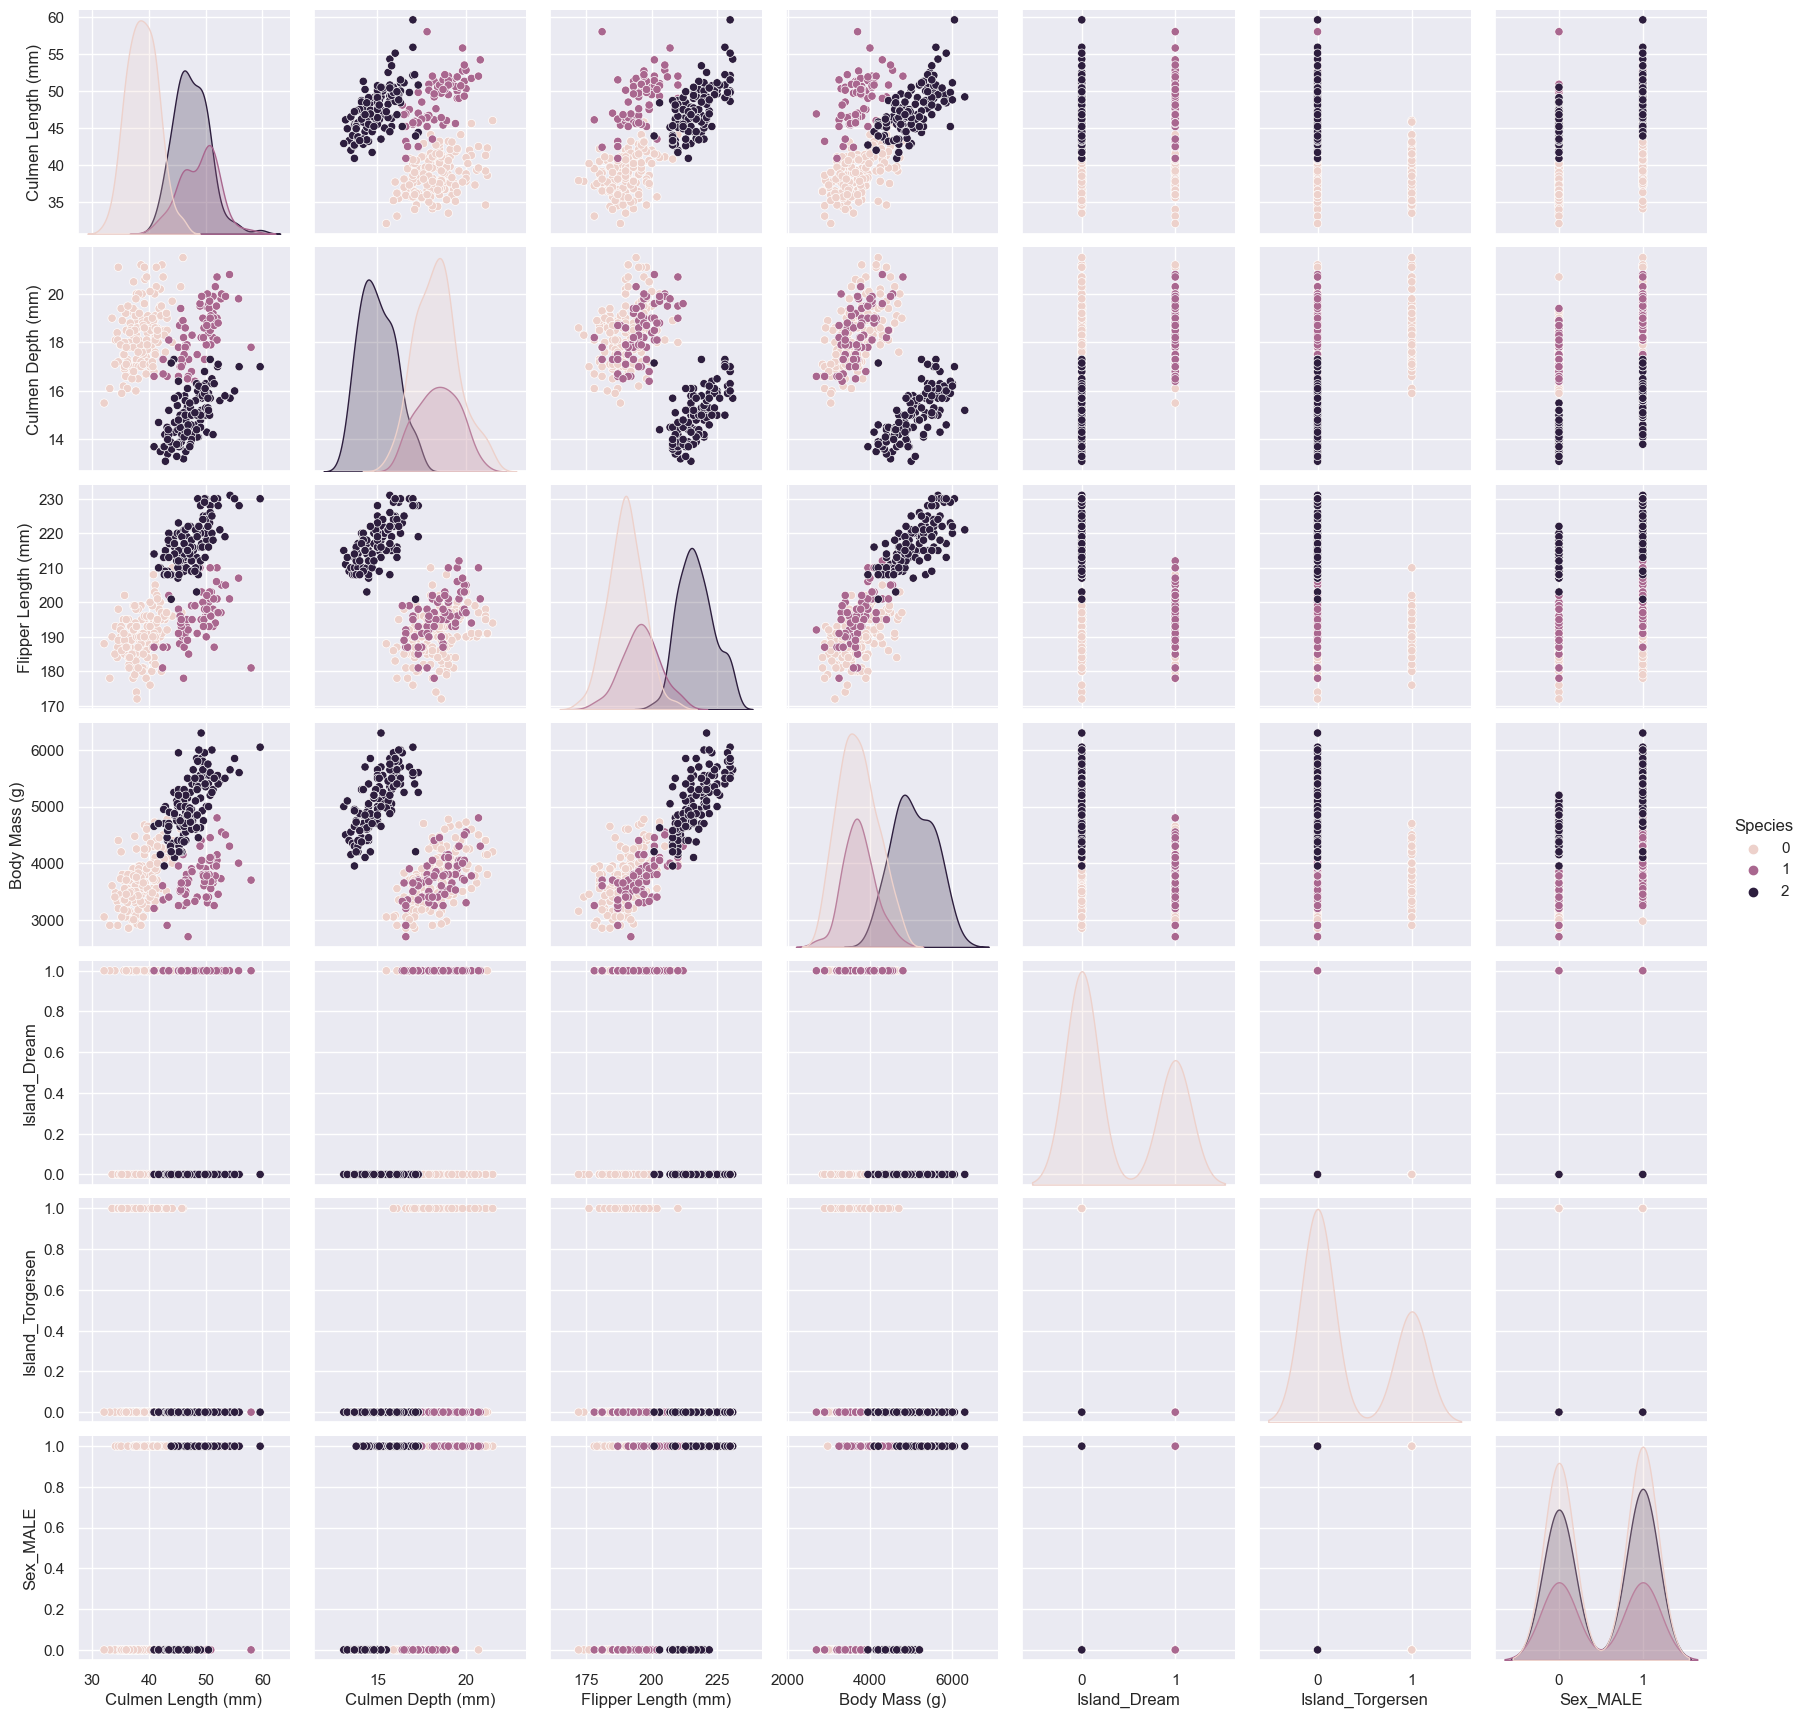

In [54]:
sns.pairplot(data=df, hue='Species')
plt.show()

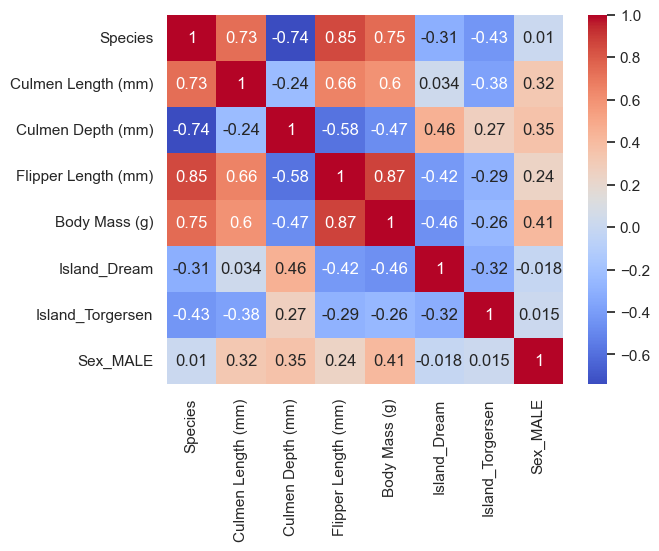

In [55]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

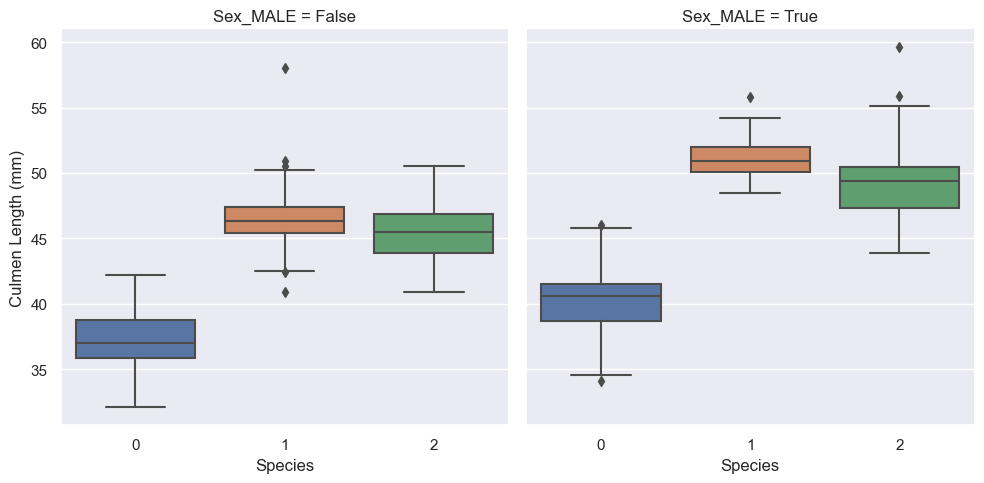

In [56]:
sns.catplot(data=df, x ='Species', y ='Culmen Length (mm)', kind='box', col = 'Sex_MALE')
plt.show()

In [57]:
# preprocessing part and EDA -completed

In [58]:
# Split the data into training and test
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Dream,Island_Torgersen,Sex_MALE
0,0,39.10000,18.70000,181.000000,3800.000000,False,True,True
1,0,39.50000,17.40000,186.000000,3800.000000,False,True,False
2,0,40.30000,18.00000,190.000000,3250.000000,False,True,False
3,0,43.92193,17.15117,200.900585,4201.900585,False,True,True
4,0,36.70000,19.30000,193.000000,3450.000000,False,True,False


In [59]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [60]:
x.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Dream,Island_Torgersen,Sex_MALE
0,39.10000,18.70000,181.000000,3800.000000,False,True,True
1,39.50000,17.40000,186.000000,3800.000000,False,True,False
2,40.30000,18.00000,190.000000,3250.000000,False,True,False
3,43.92193,17.15117,200.900585,4201.900585,False,True,True
4,36.70000,19.30000,193.000000,3450.000000,False,True,False


In [61]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int8

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y, train_size=0.75, random_state=102)

In [63]:
x_train

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_Dream,Island_Torgersen,Sex_MALE
163,51.7,20.3,194.0,3775.0,True,False,True
305,50.8,17.3,228.0,5600.0,False,False,True
150,36.0,17.1,187.0,3700.0,True,False,False
304,44.9,13.8,212.0,4750.0,False,False,False
185,51.0,18.8,203.0,4100.0,True,False,True
...,...,...,...,...,...,...,...
114,39.6,20.7,191.0,3900.0,False,False,False
242,46.5,14.5,213.0,4400.0,False,False,False
78,36.2,16.1,187.0,3550.0,False,True,False
243,46.3,15.8,215.0,5050.0,False,False,True


# Building DecisionTree Classifier Model
## Criterion = 'gini'
## Criterion = 'entropy'

In [64]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(criterion='gini')
dt1.fit(x_train, y_train)

dt2 = DecisionTreeClassifier(criterion='entropy')
dt2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [65]:
# Predict 
# Gini
y_pred_train_dt1 = dt1.predict(x_train)
y_pred_test_dt1 = dt1.predict(x_test)

# Entropy
y_pred_train_dt2 = dt2.predict(x_train)
y_pred_test_dt2 = dt2.predict(x_test)

In [66]:
# Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [67]:
# Gini
print(classification_report(y_train, y_pred_train_dt1))
print()
print(classification_report(y_test, y_pred_test_dt1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        94

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258


              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.95      1.00      0.97        19
           2       1.00      1.00      1.00        30

    accuracy                           0.99        86
   macro avg       0.98      0.99      0.99        86
weighted avg       0.99      0.99      0.99        86



In [68]:
# Entropy
print(classification_report(y_train, y_pred_train_dt2))
print()
print(classification_report(y_test, y_pred_test_dt2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        94

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258


              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.95      1.00      0.97        19
           2       1.00      1.00      1.00        30

    accuracy                           0.99        86
   macro avg       0.98      0.99      0.99        86
weighted avg       0.99      0.99      0.99        86



In [69]:
# Gini
print(confusion_matrix(y_train, y_pred_train_dt1))
print()
print(confusion_matrix(y_test, y_pred_test_dt1))

[[115   0   0]
 [  0  49   0]
 [  0   0  94]]

[[36  1  0]
 [ 0 19  0]
 [ 0  0 30]]


In [70]:
# Entropy
print(confusion_matrix(y_train, y_pred_train_dt2))
print()
print(confusion_matrix(y_test, y_pred_test_dt2))

[[115   0   0]
 [  0  49   0]
 [  0   0  94]]

[[36  1  0]
 [ 0 19  0]
 [ 0  0 30]]


In [71]:
# Gini
print(accuracy_score(y_train, y_pred_train_dt1))
print()
print(accuracy_score(y_test, y_pred_test_dt1))

1.0

0.9883720930232558


In [72]:
# Entropy
print(accuracy_score(y_train, y_pred_train_dt2))
print()
print(accuracy_score(y_test, y_pred_test_dt2))

1.0

0.9883720930232558


In [73]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt1, x_test, y_test)
plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\Lavanya R Manakalath\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
# Check Feature Importance

dt1.feature_importances_

In [ ]:
dt2.feature_importances_

In [ ]:
pd.DataFrame(index=x.columns, data=dt1.feature_importances_, columns=['Feature Importance'])

In [ ]:
pd.DataFrame(index=x.columns, data=dt2.feature_importances_, columns=['Feature Importance'])

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,12))
plot_tree(dt1)
plt.show()

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,12))
plot_tree(dt2)
plt.show()

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,12), dpi=150)
plot_tree(dt2, filled=True, feature_names = x.columns)
plt.show()

In [ ]:
# Using Post-Prunning Method to handle overfitting problem
def report_model(model):
    model_preds = model.predict(x_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    plt.figure(figsize=(15,12), dpi=150)
    plot_tree(model, filled=True, feature_names=x.columns)

In [ ]:
#prunned_dtree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)
prunned_dtree = DecisionTreeClassifier(max_depth=2)
prunned_dtree.fit(x_train, y_train)

In [ ]:
report_model(prunned_dtree)

In [ ]:
y_pred_prunned_train = prunned_dtree.predict(x_train)
y_pred_prunned_test = prunned_dtree.predict(x_test)

In [ ]:
print(accuracy_score(y_train, y_pred_prunned_train))
print()
print(accuracy_score(y_test, y_pred_prunned_test))

In [ ]:
# Cross Validation approach
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(prunned_dtree, x_train, y_train, cv=10)
test_accuracy = cross_val_score(prunned_dtree, x_test, y_test, cv=10)
print(training_accuracy.mean())
print()
print(test_accuracy.mean())

In [ ]:
training_accuracy[1]

In [ ]:
test_accuracy[0]